# COGS 209: Youth Mental Health

In [2]:
# Import libraries
import pandas as pd
import requests
import json
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

In [3]:
# Read in files
df = pd.read_csv('data/YRBS_2023.csv')
df.head()

/var/folders/jf/tn4cnxdn127dtc8x_7vb71000000gn/T/ipykernel_62490/4240641621.py:2: DtypeWarning: Columns (248) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/YRBS_2023.csv')


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,QNILLICT,QNOBESE,QNOWT,WEIGHT,STRATUM,PSU,BMIPCT,RACEETH,Q6ORIG,Q7ORIG
0,3.0,1.0,1.0,NaN,C,1.65 81.6544111131112212212212211211121111,81.6544111131112212212212211211121111111111111...,4.0,4.0,1.0,...,NaN,1.0,2.0,0.8614103 1629497.08 505180,103,16294,97.08 505180,NaN,505,180
1,4.0,2.0,1.0,2.0,E,51111111222212231222211211121111,5111111122221223122221121112111111111111111111...,5.0,1.0,1.0,...,2.0,NaN,NaN,0.8920103 16294 . 5N N233,103,16294,. 5N N233,5.0,N N,233
2,5.0,2.0,3.0,2.0,E,1.68 74.8453231111112212212212211151112211,74.8453231111112212212212211151112211361111111...,5.0,3.0,2.0,...,1.0,2.0,1.0,0.5081103 1629492.26 5506165,103,16294,92.26 5506165,5.0,506,165
3,6.0,1.0,2.0,2.0,E,41281131112112212212211211117811,4128113111211221221221121111781135212845211211...,4.0,1.0,2.0,...,1.0,NaN,NaN,1.1759103 16294 . 5N N105,103,16294,. 5N N105,5.0,N N,105
4,3.0,2.0,1.0,2.0,E,1.85 56.7051111111312212112212111151111131,56.7051111111312212112212111151111131352122111...,5.0,1.0,1.0,...,2.0,2.0,2.0,0.8920103 16294 7.57 5601125,103,16294,7.57 5601125,5.0,601,125


## Exploratory Data Analysis (EDA)

In [39]:
# Shape of dataset
df.shape

(20103, 250)

In [42]:
# Summary statistics
df.isnull().sum()

Q1           98
Q2          158
Q3          193
Q4          254
Q5         1389
           ... 
PSU           0
BMIPCT        0
RACEETH     370
Q6ORIG      269
Q7ORIG      684
Length: 250, dtype: int64

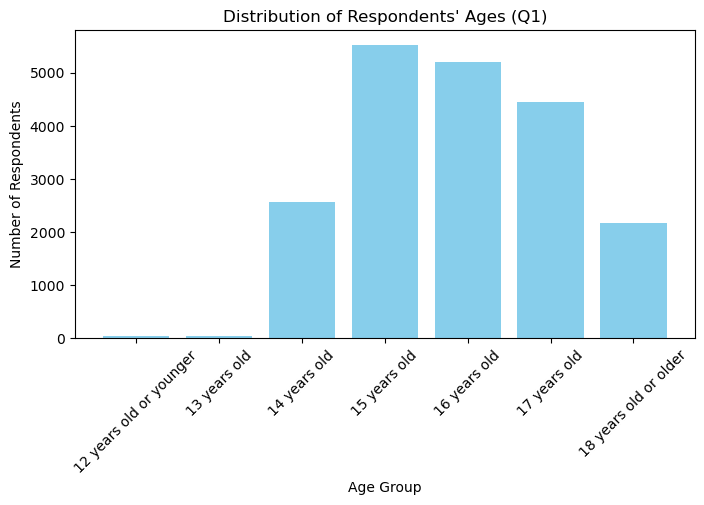

In [38]:
# Creating key for age groups
age_counts = df['Q1'].value_counts().sort_index()

age_key = {
    1.0: '12 years old or younger',
    2.0: '13 years old',
    3.0: '14 years old',
    4.0: '15 years old',
    5.0: '16 years old',
    6.0: '17 years old',
    7.0: '18 years old or older'
}

age_counts.index = age_counts.index.map(age_key)

# Display distribution of ages
plt.figure(figsize=(8,4))
ages = plt.bar(age_counts.index, age_counts, color = 'skyblue')
plt.title("Distribution of Respondents' Ages (Q1)")
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

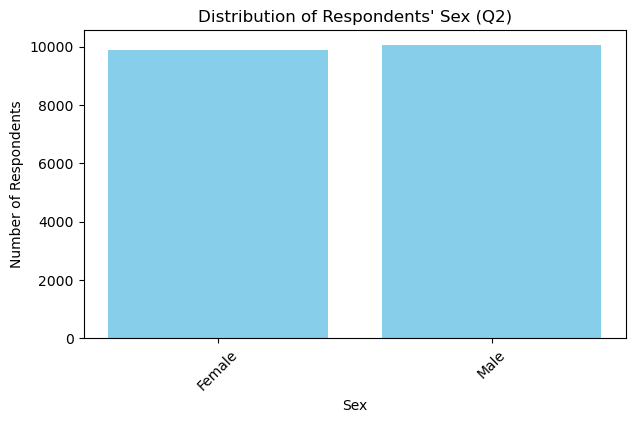

In [45]:
# Creating key for sex
sex_counts = df['Q2'].value_counts().sort_index()

sex_key = {
    1.0: 'Female',
    2.0: 'Male'
}

sex_counts.index = sex_counts.index.map(sex_key)

# Display distribution of sex
plt.figure(figsize=(7,4))
ages = plt.bar(sex_counts.index, sex_counts, color = 'skyblue')
plt.title("Distribution of Respondents' Sex (Q2)")
plt.xlabel('Sex')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()